<a href="https://colab.research.google.com/github/tsxepo-web/text-recognition-model/blob/main/basicImageManipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

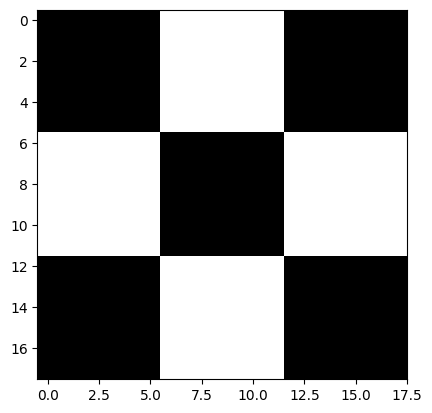

In [4]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

In [5]:
# print the first pixel of the first black box
print(cb_img[0, 0])
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

0
255


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

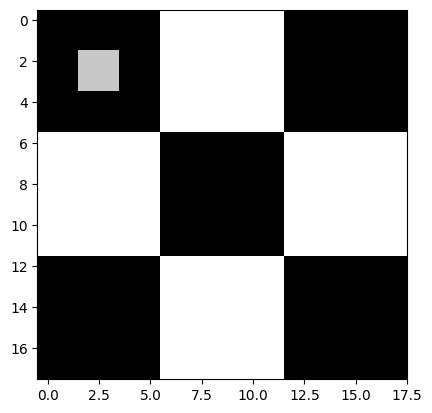

In [6]:
cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

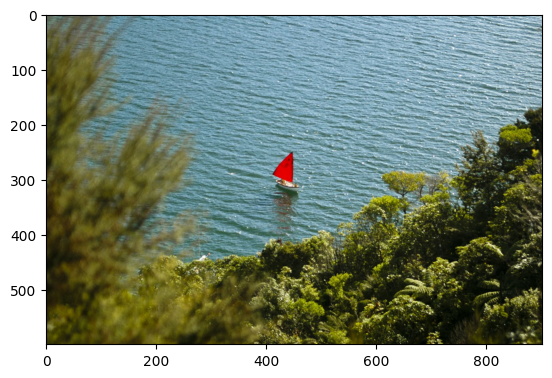

In [10]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

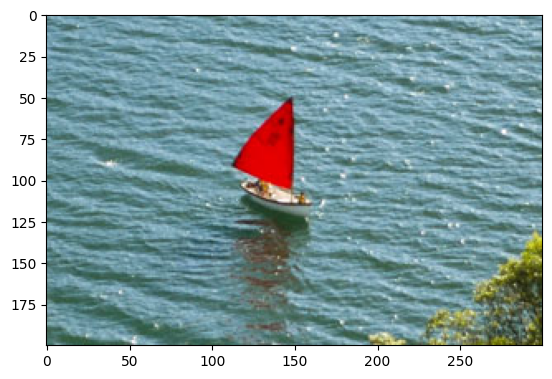

In [11]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

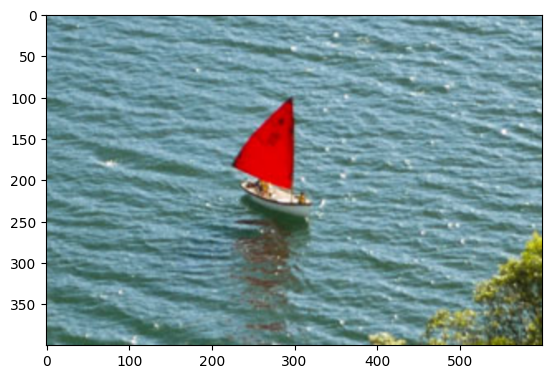

In [12]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

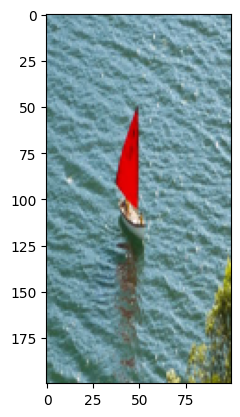

In [13]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

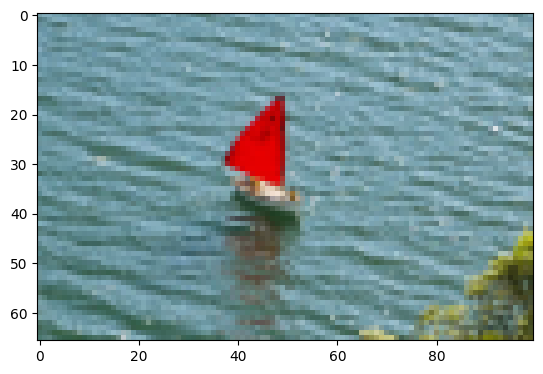

In [14]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)